In this project, I have analyzed the titanic dataset which has the demographics information for 891 (out of 2224) passengers on board the Titanic ship. The descriptions for the column names in the file (titanic-data.csv) can be seen from the Kaggle website (https://www.kaggle.com/c/titanic/data). I have broken down the analysis into four parts-

- __Data Extraction__
- __Data Cleaning__
- __Data Visualization__
- __Inferential Statistics__

__Data Extraction__: I have imported the python modules which will be used in the project, created a dataframe for the titanic data from the csv file and looked at what data values are present in the columns.


In [1]:
# Imports pandas,numpy, matplotlib, seaborn, unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import unicodecsv
from scipy import stats

sns.set_style('whitegrid')
% matplotlib inline

# Create a dataframe for the titanic data from the csv file and look at the data values
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
titanic_df = pd.read_csv('titanic-data.csv')

# Look at the first 20 rows
titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


__Data Cleaning__: Next, I have handled the missing values. Since too many values are missing from the "Cabin" column, I have not included it in the analysis. In addition, I have not included "Name" and "Ticket" columns in this analysis. For the "Age" column, I have filled in NaN values with the median age for the group. 

In [2]:
# Fill in NaN 'Age' values with median

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

__Data Visualization__: To analyze the data, I have started by exploring the question: What factors affect the survival rates among the passengers. Firstly, I have explored the relationship between survival rate and factors such as gender, ticket fare, the number of family members on board, and embarkment point individually. Then I have explored survival rate by taking multiple factors into account such as passenger class and gender; passenger class, gender, and age.

Is there any relationship between gender and survival rate?

In [56]:
# Gender
# Look at values for survival by gender in a table
table_gender = pd.crosstab(index = titanic_df['Survived'], columns = titanic_df['Sex'], margins = True)
table_gender.index = ['Not survived','Survived', 'Total']                          
table_gender

Sex,female,male,All
Not survived,81,468,549
Survived,233,109,342
Total,314,577,891


In [55]:
# Table with survival rates by gender
table_gender_perc = pd.crosstab(index = titanic_df['Survived'], columns = titanic_df['Sex'], margins = True, normalize = True)
table_gender_perc

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


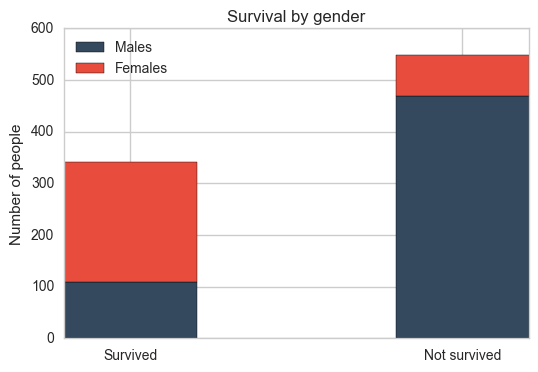

In [7]:
# Create dataframes for males and females

female_df = titanic_df[titanic_df['Sex'] == 'female']
male_df = titanic_df[titanic_df['Sex'] == 'male']

# Create data frames by survival and save the values of males/females survived in a numpy array

female_survived = female_df[female_df['Survived'] == 1]['Survived']
male_survived = male_df[male_df['Survived'] == 1]['Survived']

female_survival_num = np.array([len(female_survived.index), len(female_df.index)-len(female_survived.index)])
male_survival_num = np.array([len(male_survived.index), len(male_df.index)-len(male_survived.index)])

# Plot the number of people who survived by gender

n = len(male_survival_num)
ind = np.arange(n)
width = 0.4

p1 = plt.bar(ind, male_survival_num, width, label = 'Males', color = '#34495e')
p2 = plt.bar(ind, female_survival_num, width, bottom = male_survival_num, label = 'Females', color = '#e74c3c')

# Label x and y axis, add title and legend for plot
plt.ylabel('Number of people')
plt.title('Survival by gender')
plt.legend(loc = 'upper left')
plt.xticks(ind+width/2,('Survived', 'Not survived'))
plt.show()

From the plots and tables for survival rates by gender, we can see a strong correlation between gender and survival rate. Females had higher survival rates than males. For further analysis, I have conducted a t-test for independent samples in the end.

Next, I have explored the relationship between the ticket fare and survival rate. I have looked at the median fare amount for people who survived and died.

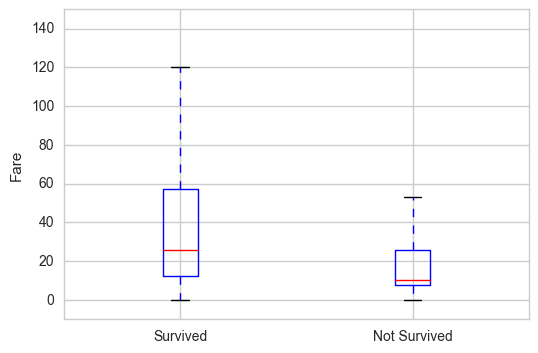

In [25]:
# Create two dataframes for getting the fare amount of people who survived and did not survive 

not_survived_fare = titanic_df['Fare'][titanic_df['Survived'] == 0]
survived_fare = titanic_df['Fare'][titanic_df['Survived'] == 1] 
fare = [survived_fare, not_survived_fare]

# Plot a boxplot 
plt.boxplot(fare)

# Add x-axis
plt.xticks(range(1, 3), ('Survived', 'Not Survived'))

# Add y-axis
plt.gca().set_ylim([-10, 150])
plt.ylabel('Fare')
plt.show()

From the boxplot for fare values, we can see that the median fare for the group of people who survived is higher than the group who did not survive. 

Further, I have explored the relationship between the number of family members aboard and the survival rate. For the analysis, I have combined the "SibSp" and "Parch" columns which give the number of siblings/spouses and parents/children respectively. The analysis might give some insight into which group of people were more likely to survive - the ones travelling alone or with family. 

[<matplotlib.text.Text at 0xec00da0>, <matplotlib.text.Text at 0xeb92160>]

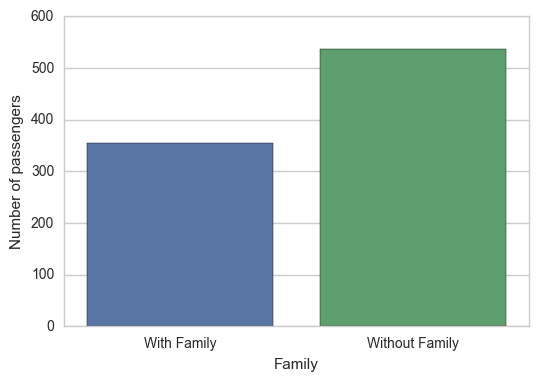

In [44]:
# Return whether the person has family aboard
def hasFamily(x, y):
    return x + y > 0

# Create a new boolean column indicating if person has family members aboard
titanic_df['Family'] = np.vectorize(hasFamily)(titanic_df['SibSp'], titanic_df['Parch'])

# Plot the number of people with and without family
g = sns.countplot(x='Family', data=titanic_df, order=[True,False])
g.set_ylabel('Number of passengers')
g.set_xticklabels(['With Family', 'Without Family'])

[<matplotlib.text.Text at 0xeba9eb8>, <matplotlib.text.Text at 0xec56a20>]

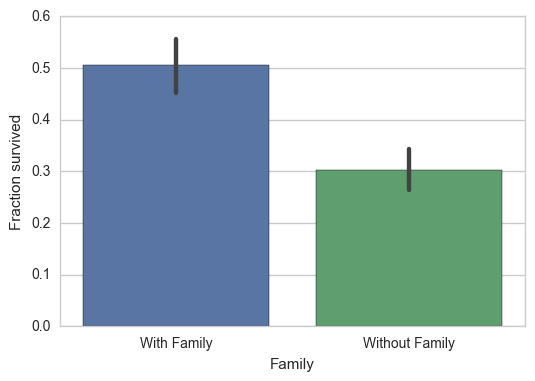

In [45]:
# Plot to show the survival rate for people with and without family

g = sns.barplot(x='Family', y='Survived', data=titanic_df, order=[True,False])
g.set_ylabel('Fraction survived')
g.set_xticklabels(['With Family', 'Without Family'])

The above barplot shows 50% survival rate for people travelling with family and 30% survival rate for people travelling alone. Next, I have explored relationship between the embarkment points and survival rate. 

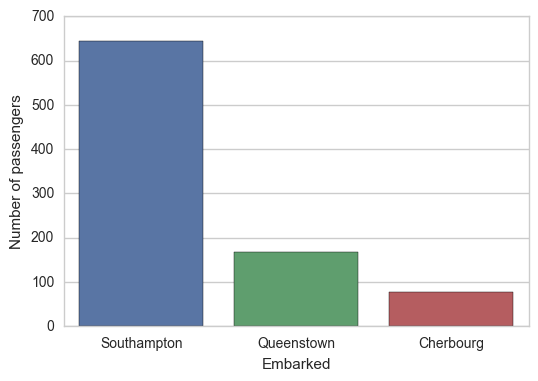

In [51]:
# Plot the number of people embarked at each station
g = sns.countplot(x='Embarked', data=titanic_df)
g.set_ylabel('Number of passengers')
g.set_xticklabels(['Southampton','Queenstown','Cherbourg'])

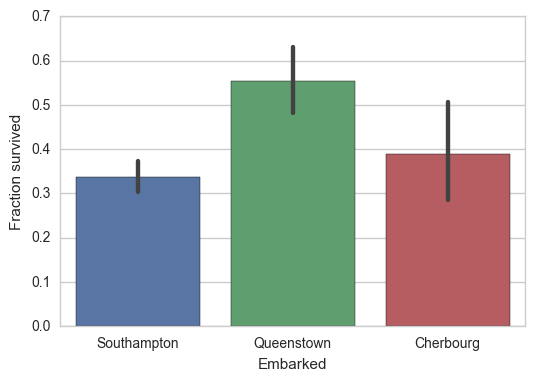

In [52]:
# Plot to show the survival rate for people who embarked at each station
g = sns.barplot(x='Embarked', y='Survived', data=titanic_df)
g.set_ylabel('Fraction survived')
g.set_xticklabels(['Southampton','Queenstown','Cherbourg'])

From the plot for embarkment points, we see that most number of passengers embarked at Southampton. In terms of survival, the group of people who embarked at Cherbourg had the higher survival rates (~55%) than Southampton or Queenstown, although the reason for that is not clear.

Next, I have looked at how passenger class and gender might have relationship with survival rate. 

In [54]:
# Survival numbers by gender and p class
table_gen_class = pd.crosstab(index=titanic_df['Survived'], columns=[titanic_df['Sex'], titanic_df['Pclass']], 
                              rownames=['Survived'], margins=True)
table_gen_class

Sex      female          male            All
Pclass        1   2    3    1    2    3     
Survived                                    
0             3   6   72   77   91  300  549
1            91  70   72   45   17   47  342
All          94  76  144  122  108  347  891

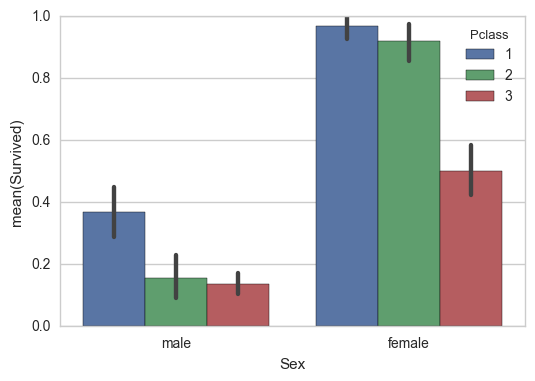

In [45]:
# Survival rates by class and gender
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_df)
sns.plt.show()

The barplot for survival rates by passenger class and gender shows that females in first class had above 90% survival rate. In contrast, females in third class had about 50% survival rate. First class male passengers had higher survival rate than second and third class males. 

Next, I have explored how the passenger class, gender and age relate to survival rates through violin plots.

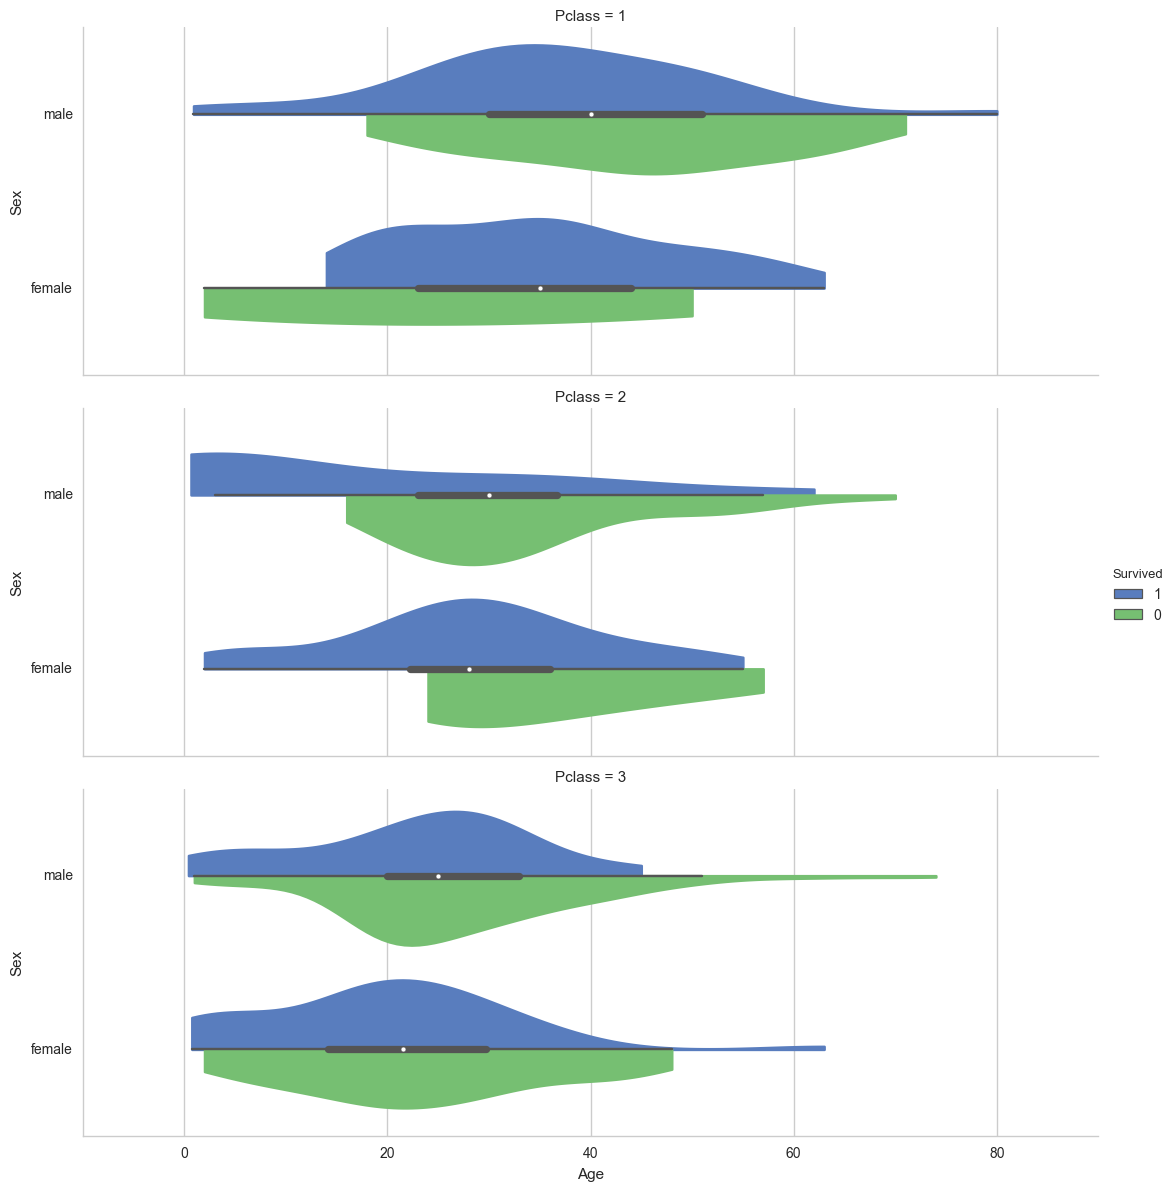

In [84]:
# Violin plot for survival by pclass, gender and age
sns.factorplot(x='Age', y='Sex', row='Pclass', hue='Survived', hue_order=[1,0],
               data=titanic_df, kind='violin', split=True, aspect=2.8, cut=0, palette='muted')
sns.plt.show()

The above violin plot aids in identifying overall trends in data. The plot shows that in the first and second class, almost all the males below the age 15 survived. Preferential treatment for children holds true for first and second class overall, but not for third class. 

__Inferential Statistics__: Since we have seen a strong correlation between gender and survival rate, I have conducted an independent groups two-tailed t-test for the following hypothesis-
Null Hypothesis: The gender of passengers has no effect on the survival rate.
Alternative Hypothesis: The expected(average) survival rates are different for the two gender groups.

Since we are comparing a subgroup (females) and the subset of overall group of passengers that does not include the subgroup (i.e. males), we can conduct independent groups t-test. We are assuming that the data is normally distributed. 

In [10]:
# independent t test across gender
from scipy import stats

print(stats.ttest_ind(female_df['Survived'], male_df['Survived']))

Ttest_indResult(statistic=19.297816550123351, pvalue=1.4060661308802594e-69)


If the p-value is smaller than the t-statistic, then we reject the null hypothesis. So gender has a significant affect on the survival rates of the passengers. 

Limitations of the study - 

1. All the above plots just explore relationships which might exist between data. Correlation does not imply causation. To draw causal relationship, we would need to do a controlled experiment, which is not possible in this case.

2. We only have sample data of 891 passengers out of the total 2224 passengers. Also the demographic information of crew on board is also included in the given data. Separating crew from the passengers might show different trends in the data.

3. The missing age values have been filled in with the median value. The actual values might have been far above or below the median.




List of Resources for the project - 

1. https://www.kaggle.com/c/titanic/data
2. https://seaborn.pydata.org/tutorial.html
3. https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html
4. http://stats.stackexchange.com/questions/19675/what-normality-assumptions-are-required-for-an-unpaired-t-test-and-when-are-the
5. https://stackoverflow.com/